In [3]:
import pickle as pkl
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [4]:
df = pd.read_csv("C:/Users/UNIQUE/Desktop/P.Datasets/credit_risk_dataset.csv")
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [6]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [7]:
# drop duplicate values
df.drop_duplicates(inplace=True)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32416.0,27.747008,6.354100,20.00,23.00,26.00,30.00,144.00
person_income,32416.0,66091.640826,62015.580269,4000.00,38542.00,55000.00,79218.00,6000000.00
person_emp_length,31529.0,4.790510,4.145490,0.00,2.00,4.00,7.00,123.00
loan_amnt,32416.0,9593.845632,6322.730241,500.00,5000.00,8000.00,12250.00,35000.00
loan_int_rate,29321.0,11.017265,3.241680,5.42,7.90,10.99,13.47,23.22
loan_status,32416.0,0.218688,0.413363,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32416.0,0.170250,0.106812,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32416.0,5.811297,4.059030,2.00,3.00,4.00,8.00,30.00


In [9]:
# class(target) distrbution in percerntage
print("Class Distribution")
print(df["loan_status"].value_counts(normalize=True) * 100)

Class Distribution
loan_status
0    78.13117
1    21.86883
Name: proportion, dtype: float64


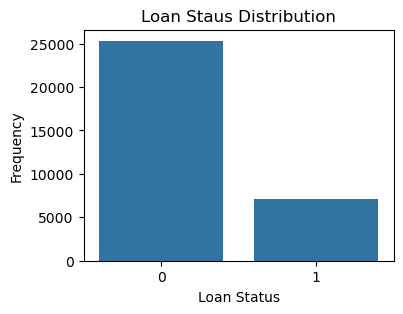

In [10]:
# check class imblance
plt.figure(figsize=(4,3))
sns.countplot(x="loan_status", data=df)
plt.xlabel("Loan Status")
plt.ylabel("Frequency")
plt.title("Loan Staus Distribution")
plt.show()

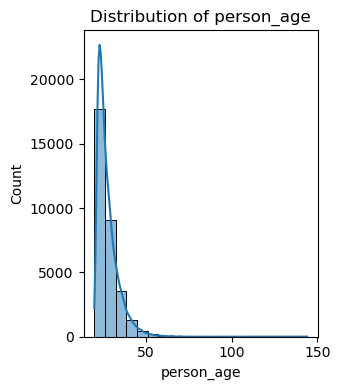

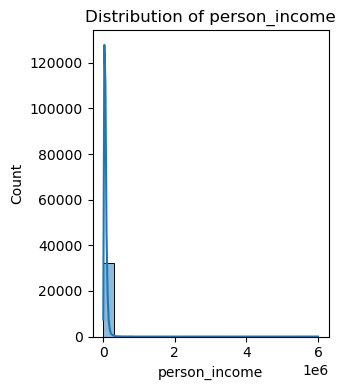

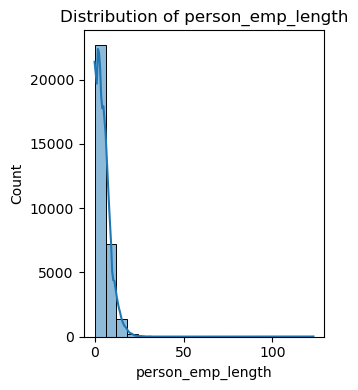

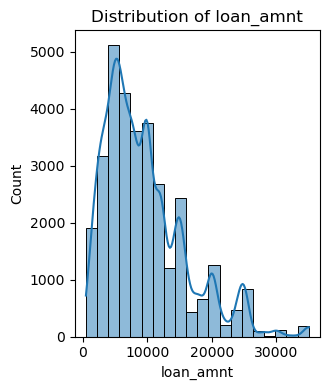

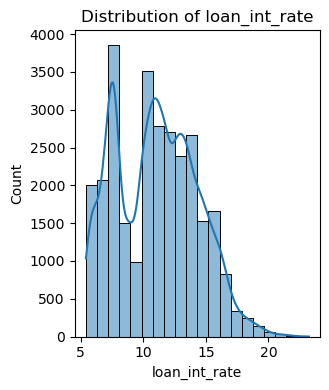

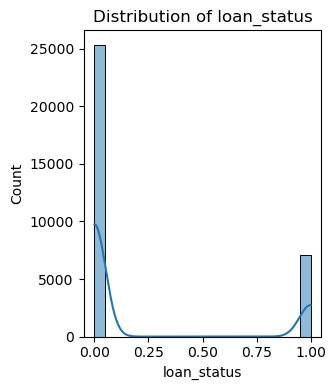

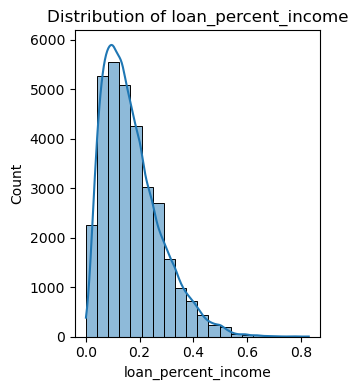

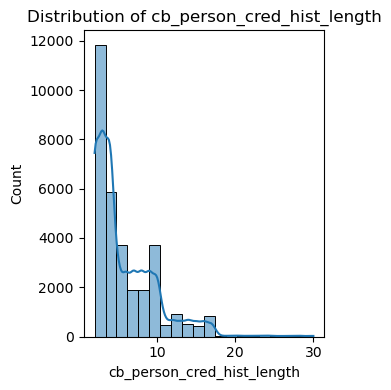

In [24]:
# Exploratory Data Analysis
# 1. Univariate analysis
# numerica values
numerical_cols = df.select_dtypes(include=["float64", "int32", "int64"]).columns
for col in  numerical_cols:
    plt.figure(figsize=(6, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel('Count')

    plt.tight_layout()
    plt.show()

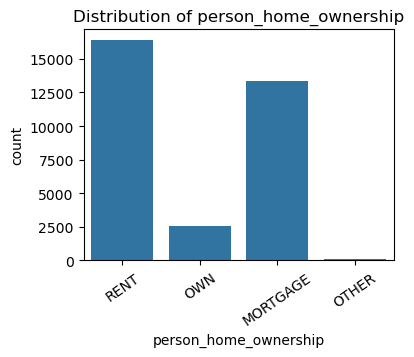

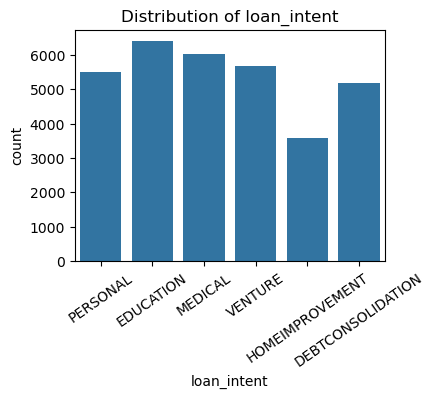

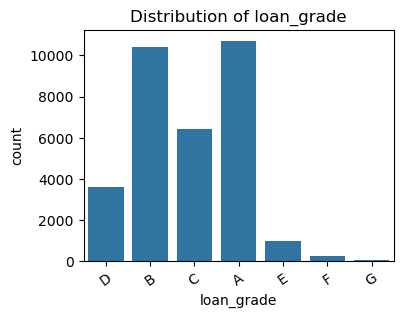

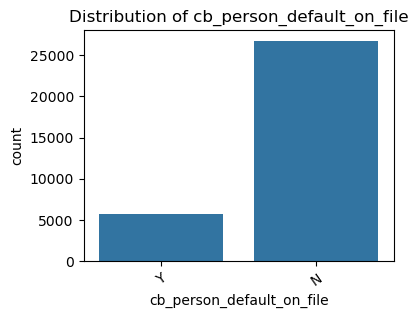

In [25]:
# categorical  values
categorical_cols = df.select_dtypes(include=["object"]).columns
for col in  categorical_cols:
    plt.figure(figsize=(4,3))
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=35)
    plt.show()

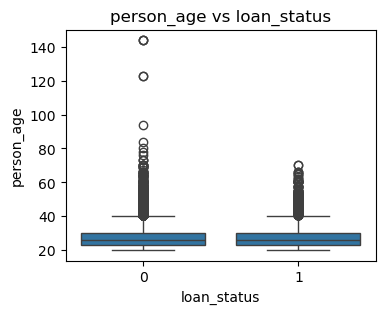

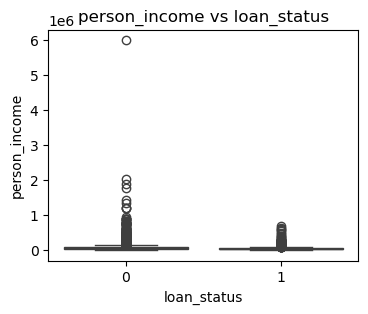

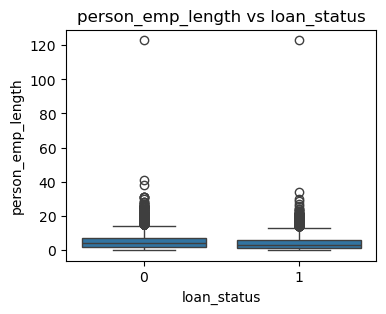

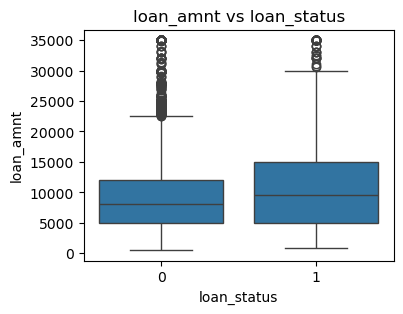

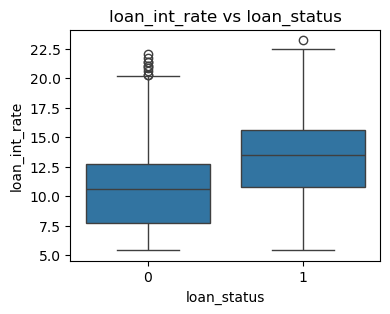

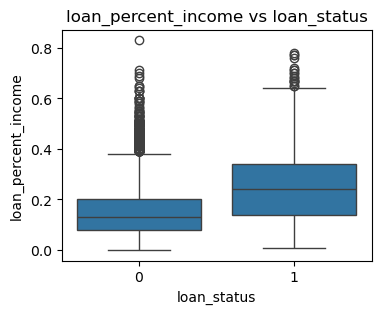

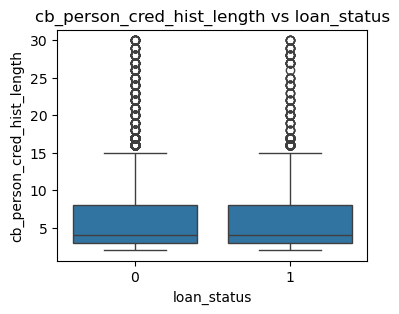

In [26]:
# bivariate analysis
# numeerical vs Target
target="loan_status"
for col in numerical_cols:
    if col != target:
        plt.figure(figsize=(4,3))
        sns.boxplot(x=target,y=col, data=df)
        plt.title(f"{col} vs {target}")
        plt.show() 

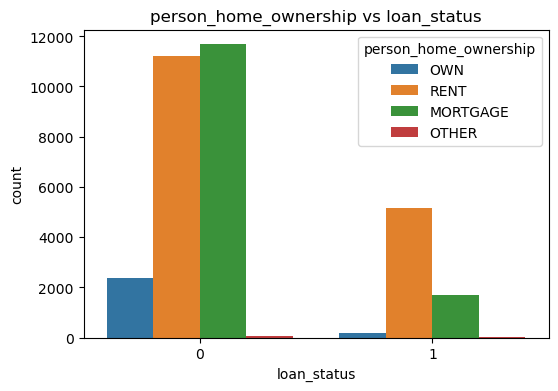

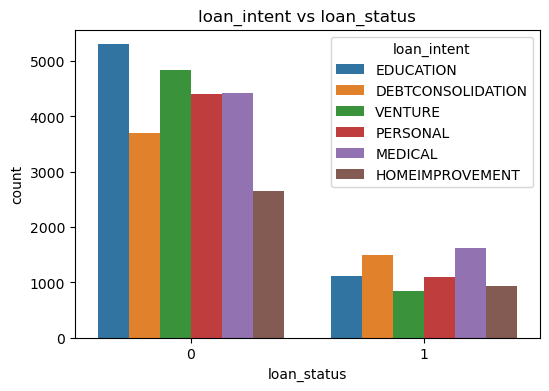

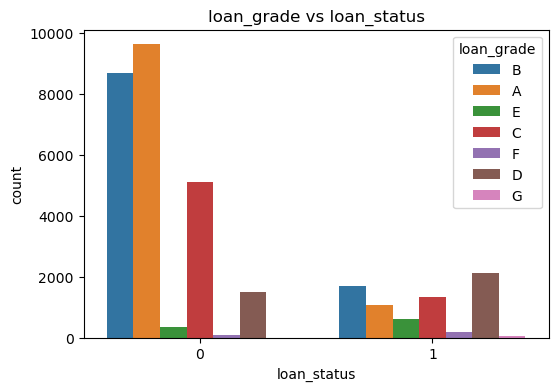

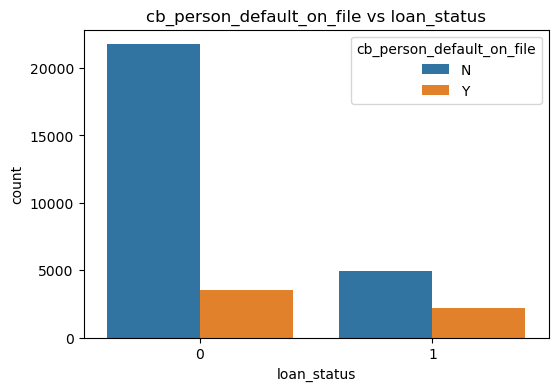

In [27]:
# numeerical vs Target
target="loan_status"
for col in categorical_cols:
    if col != target:
        plt.figure(figsize=(6,4))
        sns.countplot(x=target,hue=col, data=df)
        plt.title(f"{col} vs {target}")
        plt.show() 

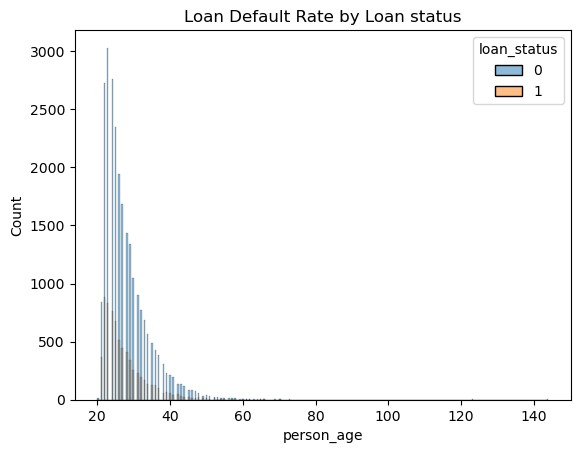

In [28]:
sns.histplot(data=df, x="person_age", hue="loan_status")
plt.title("Loan Default Rate by Loan status")
plt.show()

Text(0.5, 1.0, 'Correlation of features')

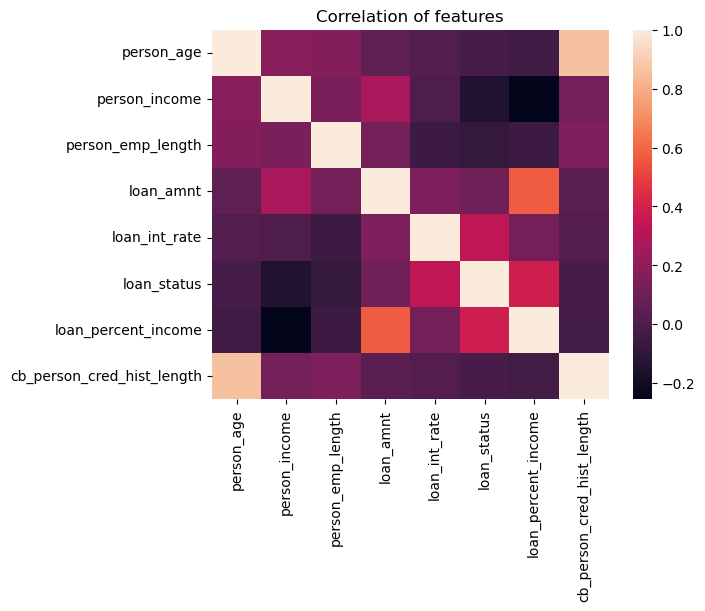

In [29]:
# check correlation matrix
corr_matrix = df.corr(numeric_only=True)

# visualize correlation 
sns.heatmap(corr_matrix)
plt.title("Correlation of features")

Text(0.5, 1.0, 'Correlation of features')

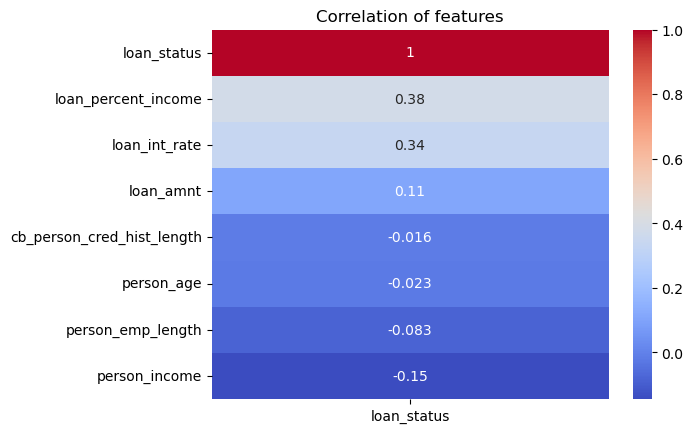

In [30]:
# visualize correlation with "loan_status"
sns.heatmap(
    corr_matrix[["loan_status"]].
    sort_values(by="loan_status", ascending=False),
    annot=True,
    cmap="coolwarm"
)
plt.title("Correlation of features")

In [31]:
# encoding categorical features and feature engineering
le=LabelEncoder()
for col in categorical_cols:
    df[col]=le.fit_transform(df[col])

df["debt_to_income_ratio"]= df["loan_amnt"]/ ((df["person_income"]*12)+1)

In [32]:
# split data
target = "loan_status"
X= df.drop(columns="loan_status")
y=df[target]
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (32416, 12)
y shape: (32416,)


In [33]:
# split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (25932, 12)
y_train shape: (25932,)
X_test shape: (6484, 12)
y_test shape: (6484,)


In [34]:
y_train.value_counts(normalize=True)
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.781


In [35]:
under_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)
print(X_train_under.shape)
X_train_under.head()

(11356, 12)


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,debt_to_income_ratio
14208,23,101138,0,2.0,1,2,20500,13.48,0.20,0,4,0.016891
11354,25,59000,3,0.0,5,2,10000,14.17,0.17,0,3,0.014124
27599,30,90000,3,10.0,2,3,15000,14.96,0.17,0,6,0.013889
8624,26,59500,0,8.0,4,1,5100,10.37,0.09,0,4,0.007143
12826,23,85000,0,1.0,5,1,10000,10.36,0.12,0,4,0.009804


In [36]:
over_sampler = RandomOverSampler(random_state= 42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)
print(X_train_over.shape)
X_train_over.head()

(40508, 12)


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,debt_to_income_ratio
0,26,47000,3,1.0,1,0,5000,7.14,0.11,0,4,0.008865
1,33,110000,0,7.0,3,1,23800,10.25,0.22,0,5,0.018030
2,25,55000,3,9.0,2,0,13000,7.51,0.24,0,4,0.019697
3,43,60000,0,3.0,5,1,18000,10.99,0.30,0,11,0.025000
4,24,40000,3,3.0,1,0,6000,6.62,0.15,0,3,0.012500


In [37]:
# Fit on `X_train`, `y_train`
model_reg = make_pipeline(
    SimpleImputer(strategy="median"),
    DecisionTreeClassifier(random_state=42)
)
model_reg.fit(X_train, y_train)

# Fit on `X_train_under`, `y_train_under`
model_under = make_pipeline(
    SimpleImputer(strategy="median"),
    DecisionTreeClassifier(random_state=42)
)
model_under.fit(X_train_under, y_train_under)

# Fit on `X_train_over`, `y_train_over`
model_over = make_pipeline(
    SimpleImputer(strategy="median"), 
    DecisionTreeClassifier(random_state=42)
)
model_over.fit(X_train_over, y_train_over)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [38]:
for m in [model_reg, model_under, model_over]:
    acc_train = m.score(X_train,y_train)
    acc_test = m.score(X_test,y_test)

    print("Training Accuracy:", round(acc_train, 4))
    print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.8879
Training Accuracy: 0.8815
Test Accuracy: 0.8034
Training Accuracy: 1.0
Test Accuracy: 0.8886


In [39]:
y_reg=model_reg.predict(X_test)
y_over=model_over.predict(X_test)
y_under=model_under.predict(X_test)

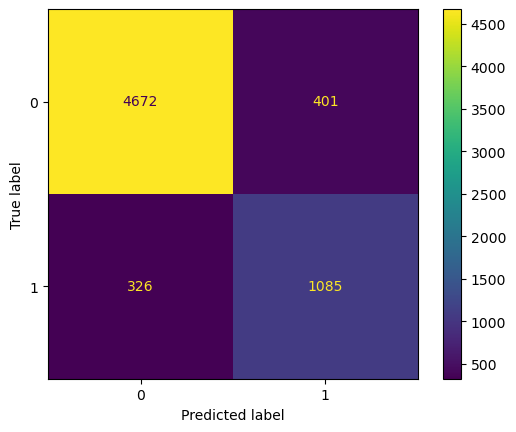

In [40]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model_reg, X_test, y_test);

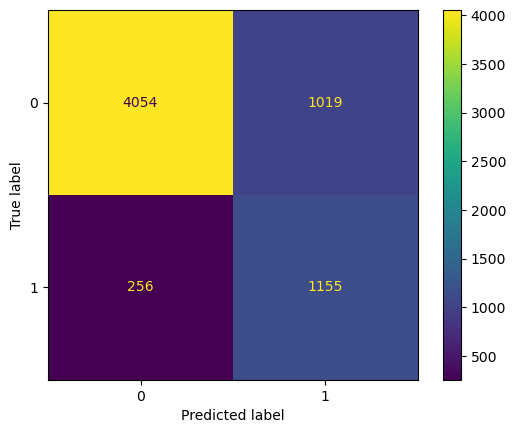

In [41]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model_under, X_test, y_test);

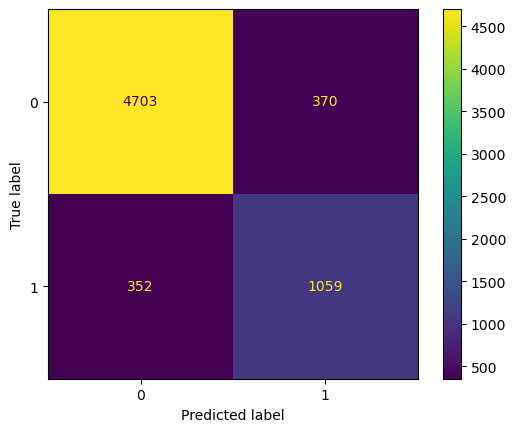

In [42]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model_over, X_test, y_test);

In [43]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test,y_reg)
recall= recall_score(y_test,y_reg)
F_1=f1_score(y_test,y_reg)
print(f"Precision : {precision :.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {F_1:.2f}")

Precision : 0.73
Recall: 0.77
F1 Score: 0.75


In [44]:
precis= precision_score(y_test,y_over)
recal= recall_score(y_test,y_over)
F_1_1=f1_score(y_test,y_over)
print(f"Precision : {precis :.2f}")
print(f"Recall: {recal:.2f}")
print(f"F1 Score: {F_1_1:.2f}")

Precision : 0.74
Recall: 0.75
F1 Score: 0.75


In [45]:
print(classification_report(y_test,y_reg))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      5073
           1       0.73      0.77      0.75      1411

    accuracy                           0.89      6484
   macro avg       0.83      0.84      0.84      6484
weighted avg       0.89      0.89      0.89      6484



In [46]:
print(classification_report(y_test,y_over))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      5073
           1       0.74      0.75      0.75      1411

    accuracy                           0.89      6484
   macro avg       0.84      0.84      0.84      6484
weighted avg       0.89      0.89      0.89      6484



In [47]:
print(classification_report(y_test,y_under))

              precision    recall  f1-score   support

           0       0.94      0.80      0.86      5073
           1       0.53      0.82      0.64      1411

    accuracy                           0.80      6484
   macro avg       0.74      0.81      0.75      6484
weighted avg       0.85      0.80      0.82      6484



In [48]:
depth = model_over.named_steps["decisiontreeclassifier"].get_depth()
print(depth)

30


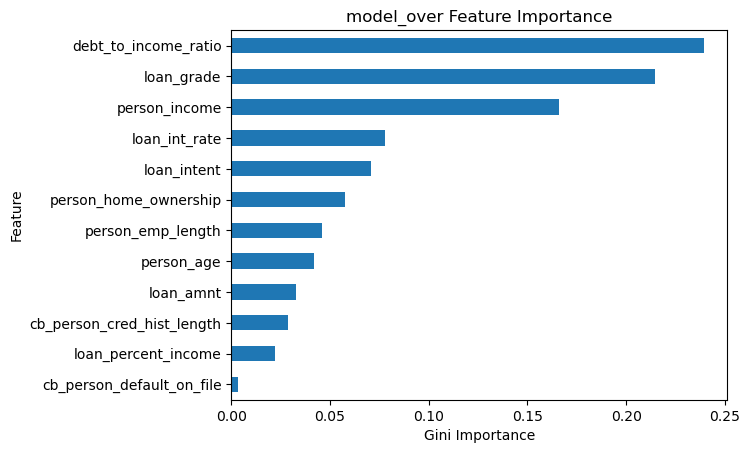

In [49]:
# Get importances
importances = model_over.named_steps["decisiontreeclassifier"].feature_importances_

# Put importances into a Series
feat_imp = pd.Series(importances, index=X_train_over.columns).sort_values()

# Plot series
feat_imp.tail(15).plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("model_over Feature Importance");

In [50]:
clf = make_pipeline(SimpleImputer(), RandomForestClassifier(random_state=42))
print(clf)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])


In [51]:
cv_acc_scores = cross_val_score(clf, X_train_over, y_train_over, cv=5, n_jobs=-1)
print(cv_acc_scores)

[0.98000494 0.98148605 0.98778079 0.98740896 0.99074188]


In [52]:
params = {
    "simpleimputer__strategy":["mean", "median"],
    "randomforestclassifier__n_estimators":range(25, 100, 25) ,
    "randomforestclassifier__max_depth": range(10, 50, 10)
}
params

{'simpleimputer__strategy': ['mean', 'median'],
 'randomforestclassifier__n_estimators': range(25, 100, 25),
 'randomforestclassifier__max_depth': range(10, 50, 10)}

In [53]:
model_rf= GridSearchCV(
    clf,
    param_grid= params,
    cv=5,
    n_jobs=-1,
    verbose=1
)
model_rf

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [54]:
# Train model
model_rf.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [55]:
y_pred=model_rf.predict(X_test)

In [56]:
# evaluate mdoel
acc_train = model_rf.score(X_train_over, y_train_over)
acc_test = model_rf.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.9301


In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5073
           1       0.93      0.73      0.82      1411

    accuracy                           0.93      6484
   macro avg       0.93      0.86      0.89      6484
weighted avg       0.93      0.93      0.93      6484



In [ ]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model_rf, X_test, y_test);

In [79]:
y_test.value_counts()

loan_status
0    5073
1    1411
Name: count, dtype: int64

In [83]:
feat_imp = pd.Series(importances, index=features).sort_values()
feat_imp

cb_person_default_on_file     0.015432
cb_person_cred_hist_length    0.034656
person_age                    0.043623
person_emp_length             0.049974
loan_intent                   0.058963
loan_amnt                     0.064808
person_home_ownership         0.065041
loan_percent_income           0.118196
loan_grade                    0.122398
loan_int_rate                 0.122674
person_income                 0.144047
debt_to_income_ratio          0.160188
dtype: float64

In [85]:
cv_results = pd.DataFrame(model_rf.cv_results_)
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,param_simpleimputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.232977,0.090014,0.036314,0.007961,10,25,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.866329,0.862503,0.869168,0.861745,0.869275,0.865804,0.003194,24
1,1.281348,0.067774,0.035798,0.004078,10,25,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.868181,0.861886,0.870279,0.862363,0.867424,0.866026,0.003324,23
2,2.565296,0.398087,0.060699,0.002205,10,50,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.868551,0.865712,0.870032,0.864708,0.869152,0.867631,0.002057,20
3,2.482371,0.183184,0.055192,0.003006,10,50,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.868798,0.865836,0.871266,0.863227,0.868288,0.867483,0.002739,21
4,3.528532,0.150181,0.080013,0.006781,10,75,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.869292,0.865218,0.870896,0.863474,0.870263,0.867829,0.002941,19
5,3.475594,0.066220,0.090924,0.023699,10,75,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.869662,0.864972,0.870402,0.862239,0.868658,0.867187,0.003099,22
6,1.666969,0.014355,0.046866,0.006515,20,25,mean,"{'randomforestclassifier__max_depth': 20, 'ran...",0.972106,0.973834,0.981486,0.979385,0.982718,0.977906,0.004205,18
7,1.718969,0.007083,0.044282,0.005255,20,25,median,"{'randomforestclassifier__max_depth': 20, 'ran...",0.973710,0.971365,0.983831,0.980867,0.981978,0.978350,0.004896,17
8,3.187407,0.041816,0.092289,0.007702,20,50,mean,"{'randomforestclassifier__max_depth': 20, 'ran...",0.975562,0.977043,0.985929,0.982471,0.987162,0.981633,0.004640,14
9,3.261505,0.087627,0.084051,0.001991,20,50,median,"{'randomforestclassifier__max_depth': 20, 'ran...",0.976055,0.975932,0.985189,0.980743,0.985681,0.980720,0.004225,16


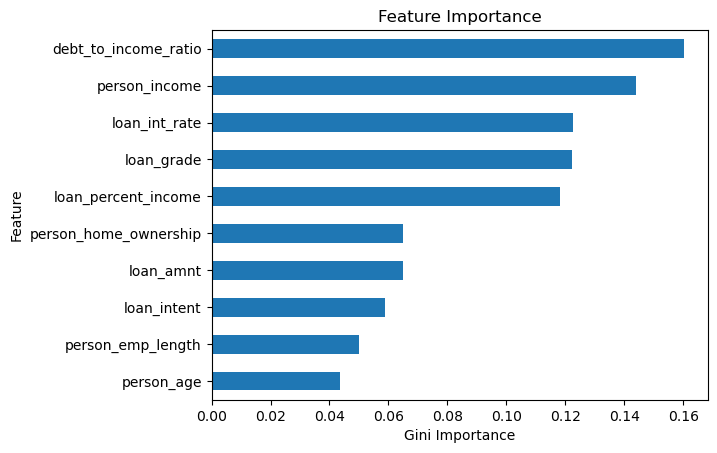

In [82]:
# Get feature names from training data
features = X_train_over.columns
# Extract importances from model
importances = model_rf.best_estimator_.named_steps[
    "randomforestclassifier"
].feature_importances_
# Create a series with feature names and importances
feat_imp = pd.Series(importances, index=features).sort_values()
# Plot 10 most important features
feat_imp.tail(10).plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

In [86]:
with open("loan_rf_model.pkl", "wb") as f:
    pkl.dump(model_rf,f)

In [87]:
# Load "loan_rf_model.pkl"
with open("loan_rf_model.pkl", "rb") as f:
    loaded_model = pkl.load(f)
print(loaded_model)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)
